In [13]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import dtreeviz

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def log_odds(x):
    return np.log((x==1).sum() / (x==0).sum())

def residual(target, prob):
    return target - prob

f0 = 0.6931471805599453
p0 = 0.6666666666666666
r0 = [ 0.33333333 -0.66666667  0.33333333]


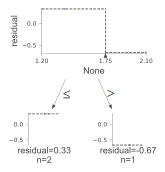

In [15]:
# Toy dataset from Raschka et al. (https://github.com/rasbt/machine-learning-book)
X = np.array([
    [1.12, 1.4],
    [2.45, 2.1],
    [3.54, 1.2]
])
y = np.array([1, 0, 1])

# 1. Create base classifier -- the log odds of the data
f0 = log_odds(y)
print(f"f0 = {f0}")

# 2. Create new weak learner by first converting original learner output into probabilities
p0 = sigmoid(f0)
print(f"p0 = {p0}")

# 2a. Compute residuals of the initial learner to use as targets to fit the new learner
r0 = residual(y, p0)
print(f"r0 = {r0}")

# 2b. Fit a new learner using residuals
f1 = DecisionTreeRegressor(max_depth=1).fit(X, r0)

tree_vis = dtreeviz(f1, X, r0, target_name="residual")
tree_vis

Now that the weak learner is fit to the residuals, each leaf node is optimized to minimize the logistic loss function.

\begin{align*}
\gamma_{jm} &= \text{arg min}_y \sum_{x_i \in R_{jm}}L(y_i, F_{m-1}(x_i) + \gamma)\\
&= \log(1 + \exp(\hat{y}_i + \gamma)) - y_i(\hat{y}_i + \gamma)
\end{align*}

In [20]:
preds = f1.predict(X)
values, counts = np.unique(preds, return_counts=True)
print(values, counts)

[-0.66666667  0.33333333] [1 2]
